# Project Logistic Regression Model

_Authors: Joel Quek (SG)_

# Exploratory Data Analysis

## Import Libraries

In [67]:
#All libraries used in this project are listed here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

import re
from bs4 import BeautifulSoup 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, precision_score,accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score



# Open Scraped Datasets

The jupytyer notebooks for scraping are 'reddit-scrape.ipynb' and 'wallstreetbets-scrape.ipynb'

In [68]:
investing_df = pd.read_csv('datasets/investing.csv')
stockmarket_df = pd.read_csv('datasets/stockmarket.csv')

## r/investing

In [69]:
investing_df.shape

(7995, 75)

In [70]:
investing_df.iloc[investing_df.shape[0]-1]['created_utc']

# GMT: Friday, July 8, 2022 9:18:46 AM

1657271926

In [71]:
investing_df=investing_df[['subreddit', 'author', 'selftext', 'title']]
investing_df.head()

,subreddit,author,selftext,title
0,investing,HomeInvading,"Hey guys, I’m a 22 year old male, I grew up wi...",Help a young man out would ya?
1,investing,ocean-airseashell10,[removed],Treasury bonds is it a good idea to buy
2,investing,ocean-airseashell10,[removed],How to buy treasury bonds? Is treasury’s direc...
3,investing,iamjokingiamserious,[removed],Early Exercise of Stock Options
4,investing,jamesterryburke01,Hello Redditors 👋 \n\nI work as a Investment C...,Alternative Investments -


In [72]:
investing_df1=investing_df[['subreddit', 'selftext']]
investing_df2=investing_df[['subreddit', 'title']]

investing_df1.rename(columns={'selftext':'Text'},inplace=True)
investing_df2.rename(columns={'title':'Text'},inplace=True)

C:\Users\redoc\AppData\Local\Temp\ipykernel_98540\2530647326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investing_df1.rename(columns={'selftext':'Text'},inplace=True)
C:\Users\redoc\AppData\Local\Temp\ipykernel_98540\2530647326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investing_df2.rename(columns={'title':'Text'},inplace=True)


In [73]:
investing_df = pd.concat([investing_df1, investing_df2], ignore_index=True,axis=0)
investing_df.head()

,subreddit,Text
0,investing,"Hey guys, I’m a 22 year old male, I grew up wi..."
1,investing,[removed]
2,investing,[removed]
3,investing,[removed]
4,investing,Hello Redditors 👋 \n\nI work as a Investment C...


In [74]:
investing_df.shape

(15990, 2)

## r/stockmarket

In [75]:
stockmarket_df.shape

(7494, 81)

In [76]:
stockmarket_df.iloc[stockmarket_df.shape[0]-1]['created_utc']

# GMT: Wednesday, July 13, 2022 2:13:58 AM

1657678438

In [77]:
stockmarket_df=stockmarket_df[['subreddit', 'selftext', 'title']]
stockmarket_df.head()

,subreddit,selftext,title
0,StockMarket,NaN,Looking for the next exogenous event that take...
1,StockMarket,[Link to the full article (4 min read)](https:...,China stocks notch trillion-dollar gain on hop...
2,StockMarket,NaN,Get ready for some economic news and company e...
3,StockMarket,NaN,Market Recap! Bear Market Blues! Palantir (PLT...
4,StockMarket,NaN,Why it's not smart to rely on the RSI divergence


In [78]:
stockmarket_df.shape

(7494, 3)

In [79]:
stockmarket_df1=stockmarket_df[['subreddit', 'selftext']]
stockmarket_df2=stockmarket_df[['subreddit', 'title']]

stockmarket_df1.rename(columns={'selftext':'Text'},inplace=True)
stockmarket_df2.rename(columns={'title':'Text'},inplace=True)

C:\Users\redoc\AppData\Local\Temp\ipykernel_98540\961984385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockmarket_df1.rename(columns={'selftext':'Text'},inplace=True)
C:\Users\redoc\AppData\Local\Temp\ipykernel_98540\961984385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockmarket_df2.rename(columns={'title':'Text'},inplace=True)


In [80]:
stockmarket_df = pd.concat([stockmarket_df1, stockmarket_df2], ignore_index=True,axis=0)
stockmarket_df.head()

,subreddit,Text
0,StockMarket,NaN
1,StockMarket,[Link to the full article (4 min read)](https:...
2,StockMarket,NaN
3,StockMarket,NaN
4,StockMarket,NaN


In [81]:
stockmarket_df.shape

(14988, 2)

# Final Cleaning 

## Handling Missing Values

In [ ]:
#investing_df['selftext']=investing_df['selftext'].fillna('')
#stockmarket_df['selftext']=stockmarket_df['selftext'].fillna('')


In [82]:
investing_df=investing_df.dropna()
stockmarket_df=stockmarket_df.dropna()

In [83]:
investing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15964 entries, 0 to 15989
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  15964 non-null  object
 1   Text       15964 non-null  object
dtypes: object(2)
memory usage: 374.2+ KB


In [84]:
stockmarket_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11181 entries, 1 to 14987
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  11181 non-null  object
 1   Text       11181 non-null  object
dtypes: object(2)
memory usage: 262.1+ KB


## Concatenate both Dataframes

In [85]:
df = pd.concat([investing_df,stockmarket_df],ignore_index=True)

In [86]:
df.shape

(27145, 2)

In [87]:
df['subreddit'].value_counts()

investing      15964
StockMarket    11181
Name: subreddit, dtype: int64

In [88]:
df.head()

,subreddit,Text
0,investing,"Hey guys, I’m a 22 year old male, I grew up wi..."
1,investing,[removed]
2,investing,[removed]
3,investing,[removed]
4,investing,Hello Redditors 👋 \n\nI work as a Investment C...


## Lowercase

In [89]:
df['Text']=[c.lower() for c in df['Text']]

## Remove Non Letters

In [90]:
df['Text']=df['Text'].map(lambda x: re.sub("[^a-zA-Z]", " ", x)) 

## Remove Stop Words

In [91]:
def remove_stop_words(text):
    stops = stopwords.words('english')
    stops=set(stops)
    text = " ".join([word for word in text.split() if word not in (stops)])
    # text = [w for w in text if not w in stops]

    return text

In [92]:
df['Text']=df['Text'].map(lambda x: remove_stop_words(x))

## Hot Encode Target Vector

In [93]:
df['subreddit']=df['subreddit'].map({'investing': 0, 'StockMarket': 1})

In [94]:
df.head()

,subreddit,Text
0,0,hey guys year old male grew greatest backgroun...
1,0,removed
2,0,removed
3,0,removed
4,0,hello redditors work investment consultant bou...


## Remove Rows where Text is 'removed'

In [95]:
df=df[df['Text'].str.contains('removed')==False]

In [96]:
df.head()

,subreddit,Text
0,0,hey guys year old male grew greatest backgroun...
4,0,hello redditors work investment consultant bou...
7,0,back around ish remember reading ad charles sc...
11,0,greetings everyone general quick question look...
18,0,coming share mind bogglingly low valuation par...


In [97]:
X=df['Text']
y=df['subreddit']

In [98]:
y.value_counts(normalize = True)

0    0.5521
1    0.4479
Name: subreddit, dtype: float64

In [99]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y, # stratify means the proportion of 0s and 1s are kept
                                                    random_state=42)

----

# Count Vectorizer

In [100]:
# Instantiate a CountVectorizer with the default hyperparameters.
cvec = CountVectorizer()

In [101]:
X_train

25325          regencell rgc performing stock among us ipo
26350    help understanding impairment calculation mstr...
14194                              beginner investor start
366      turning days saving money invest wondering goo...
12184                         new discord server investing
                               ...                        
11331                            right idea passive income
15799                                help boy graduate lfg
4668     hey first time posting working weekend job cou...
15879                       investing life insurance money
16345    elon musk friday p et close deal twitter trial...
Name: Text, Length: 12924, dtype: object

In [102]:
# Fit the vectorizer on our corpus.
cvec.fit(X_train)

CountVectorizer()

In [103]:
# Transform the corpus.
X_train = cvec.transform(X_train) 
# transform creates the vector of words

In [104]:
X_train.shape

(12924, 23993)

In [105]:
print(X_train)

  (0, 795)	1
  (0, 10963)	1
  (0, 15359)	1
  (0, 17258)	1
  (0, 17790)	1
  (0, 19966)	1
  (0, 22271)	1
  (1, 837)	1
  (1, 2929)	1
  (1, 6361)	1
  (1, 9629)	1
  (1, 10318)	1
  (1, 13548)	1
  (1, 21951)	1
  (2, 1925)	1
  (2, 10905)	1
  (2, 19839)	1
  (3, 961)	1
  (3, 1032)	1
  (3, 2401)	1
  (3, 5047)	1
  (3, 5050)	1
  (3, 6653)	1
  (3, 7556)	1
  (3, 9020)	2
  :	:
  (12923, 21078)	1
  (12923, 21229)	2
  (12923, 21247)	4
  (12923, 21514)	8
  (12923, 21580)	1
  (12923, 21651)	1
  (12923, 21722)	10
  (12923, 21727)	2
  (12923, 21916)	1
  (12923, 22059)	3
  (12923, 22069)	1
  (12923, 22076)	2
  (12923, 22202)	1
  (12923, 22332)	4
  (12923, 22974)	1
  (12923, 23010)	1
  (12923, 23082)	1
  (12923, 23090)	2
  (12923, 23126)	1
  (12923, 23149)	1
  (12923, 23267)	1
  (12923, 23433)	1
  (12923, 23445)	5
  (12923, 23536)	3
  (12923, 23797)	1


In [106]:
cvec.get_feature_names()[1000:1010]

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['apms',
 'apnews',
 'apo',
 'apocalypse',
 'apocalyptic',
 'apog',
 'apolitical',
 'apollo',
 'apologies',
 'apologize']

In [107]:
# Transform test
X_test = cvec.transform(X_test) # we fit the CountVectorizer data based on the X_Train and use that model to transform T_Test

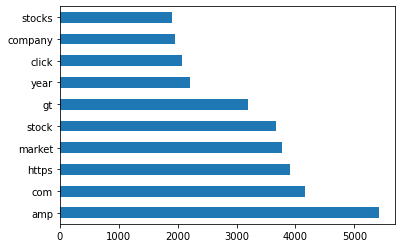

In [108]:
# convert training data to dataframe
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names()) # cvec is the CountVectorizer object

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh'); # head(10) gives top ten words

## Baseline Accuracy

In [109]:
y_test.value_counts(normalize=True)

0    0.552152
1    0.447848
Name: subreddit, dtype: float64

# Reinstantiate Train and Test Data

To avoid error of instantiating/fitting count vectorizer down below [IMPORTANT]

In [110]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y, # stratify means the proportion of 0s and 1s are kept
                                                    random_state=42)

# 1. Logistic Regression with Count Vectorizer

In [111]:
pipe = Pipeline([('cvec', CountVectorizer()),
                 ('lr', LogisticRegression(solver='lbfgs'))
                ])

In [112]:
cross_val_score(pipe, X_train, y_train, cv=5)


c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

array([0.73926499, 0.72533849, 0.70870406, 0.7237911 , 0.73916409])

In [113]:
# ii. Fit into model
pipe.fit(X_train, y_train)

# Training score
print(pipe.score(X_train, y_train))

# Test score
print(pipe.score(X_test, y_test))

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8995666976168369
0.7386113729186302


### GridSearch

In [114]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [0.05], # change to percentage
    'cvec__max_df': [0.9],
    'cvec__ngram_range': [(1,2)],
    "lr__C": [10,2,1.25] # np.logspace() # 1,1.25,num=5
}
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
#scorers dictionary allows us to prioritize which score we want for the model. Then we refit back the parameters to our model
gs_count_logreg = GridSearchCV(pipe,param_grid=pipe_params,scoring=scorers,refit='accuracy_score', cv=5)

# https://stackoverflow.com/questions/24005762/understanding-the-ngram-range-argument-in-a-countvectorizer-in-sklearn 
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer

This gridsearch took 11 min 6.3 sec

In [115]:
gs_count_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9],
                         'cvec__max_features': [2500, 3000, 3500],
                         'cvec__min_df': [0.05], 'cvec__ngram_range': [(1, 2)],
                         'lr__C': [10, 2, 1.25]},
             refit='accuracy_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [116]:
print(gs_count_logreg.best_score_)
gs_count_logreg.best_params_

0.6108786401662366


{'cvec__max_df': 0.9,
 'cvec__max_features': 2500,
 'cvec__min_df': 0.05,
 'cvec__ngram_range': (1, 2),
 'lr__C': 2}

In [117]:
gs_count_logreg.score(X_train, y_train)


0.6142061281337048

In [118]:
gs_count_logreg.score(X_test, y_test)


0.6176562990889098

Try Again but with different C values for Logistic Regression

In [119]:
for i in np.logspace(0.096,1,num=10):
    print(1/i)

0.8016780633876791
0.6361441760824124
0.504790428034794
0.4005591590962541
0.31785000472481023
0.25221898740626414
0.20013974095522713
0.15881403823537268
0.12602144191976725
0.1


In [120]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [0.05],
    'cvec__max_df': [.8,.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    "lr__C": np.logspace(0.096,1,num=10) # np.logspace()
}
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
#scorers dictionary allows us to prioritize which score we want for the model. Then we refit back the parameters to our model
gs_count_logreg2 = GridSearchCV(pipe,param_grid=pipe_params,scoring=scorers,refit='accuracy_score', cv=5)

This gridsearch took  15 min

In [121]:
gs_count_logreg2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.8, 0.9, 0.95],
                         'cvec__max_features': [2500, 3000, 3500],
                         'cvec__min_df': [0.05],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'lr__C': array([ 1.24738351,  1.57197069,  1.98102013,  2.49651013,  3.14613807,
        3.96480856,  4.99650892,  6.29667258,  7.93515758, 10.        ])},
             refit='accuracy_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [122]:
print(gs_count_logreg2.best_score_)
gs_count_logreg2.best_params_

0.6108786401662366


{'cvec__max_df': 0.8,
 'cvec__max_features': 2500,
 'cvec__min_df': 0.05,
 'cvec__ngram_range': (1, 1),
 'lr__C': 1.247383514242943}

In [123]:
gs_count_logreg2.score(X_train, y_train)


0.6142061281337048

In [124]:
gs_count_logreg2.score(X_test, y_test)


0.6176562990889098

---

In [125]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [1, 2],
    'cvec__max_df': [.8,.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    "lr__C": np.logspace(1,1.25,num=5) # np.logspace()
}
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
#scorers dictionary allows us to prioritize which score we want for the model. Then we refit back the parameters to our model
gs_count_logreg3 = GridSearchCV(pipe,param_grid=pipe_params,scoring=scorers,refit='accuracy_score', cv=5)

This gridsearch took  16  min   25.4 sec

In [126]:
gs_count_logreg3.fit(X_train, y_train)

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.8, 0.9, 0.95],
                         'cvec__max_features': [2500, 3000, 3500],
                         'cvec__min_df': [1, 2],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'lr__C': array([10.        , 11.54781985, 13.33521432, 15.39926526, 17.7827941 ])},
             refit='accuracy_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [127]:
print(gs_count_logreg3.best_score_)
gs_count_logreg3.best_params_

0.7034983322454503


{'cvec__max_df': 0.8,
 'cvec__max_features': 3500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'lr__C': 11.547819846894582}

In [128]:
gs_count_logreg3.score(X_train, y_train)


0.8382079851439183

In [129]:
gs_count_logreg3.score(X_test, y_test)


0.7200754005655042

---

## BOOLEAN MASKING ON DATAFRAME 

WITH ACTUAL TEST TARGET AND PREDICTED VALUES TO FIND OUT THE FALSE POSITIVES AND FALSE NEGATIVES

In [131]:
preds = gs_count_logreg.predict(X_test)

In [140]:
preds = pd.Series(preds)

print(type(preds))
preds

<class 'pandas.core.series.Series'>


0       0
1       0
2       0
3       1
4       0
       ..
6361    0
6362    0
6363    0
6364    1
6365    1
Length: 6366, dtype: int64

In [137]:
print(type(X_test))

X_test.head()

<class 'pandas.core.series.Series'>


8406           traditional roth tax bracket actually lower
14781          daily general discussion advice thread july
7471     hi wondering would good place put pitch invest...
25723    bed bath amp beyond inc bbby one heavily short...
20041                               go well morning coffee
Name: Text, dtype: object

In [138]:
print(type(y_test))

y_test

<class 'pandas.core.series.Series'>


8406     0
14781    0
7471     0
25723    1
20041    1
        ..
13748    0
21637    1
20291    1
14025    0
22170    1
Name: subreddit, Length: 6366, dtype: int64

In [142]:
df = pd.concat([X_test, y_test], axis=1).reset_index()
df

,index,Text,subreddit
0,8406,traditional roth tax bracket actually lower,0
1,14781,daily general discussion advice thread july,0
2,7471,hi wondering would good place put pitch invest...,0
3,25723,bed bath amp beyond inc bbby one heavily short...,1
4,20041,go well morning coffee,1
...,...,...,...
6361,13748,drought hitting ca italy france hard,0
6362,21637,needed become hedge fund manager analyst,1
6363,20291,u gdp accelerated pace q better expected growt...,1
6364,14025,rate portfolio individual stocks,0


In [143]:
df = pd.concat([df, preds], axis=1).reset_index()
# df.drop(['level_0','index'],axis=1, inplace=True)
df

,level_0,index,Text,subreddit,0
0,0,8406,traditional roth tax bracket actually lower,0,0
1,1,14781,daily general discussion advice thread july,0,0
2,2,7471,hi wondering would good place put pitch invest...,0,0
3,3,25723,bed bath amp beyond inc bbby one heavily short...,1,1
4,4,20041,go well morning coffee,1,0
...,...,...,...,...,...
6361,6361,13748,drought hitting ca italy france hard,0,0
6362,6362,21637,needed become hedge fund manager analyst,1,0
6363,6363,20291,u gdp accelerated pace q better expected growt...,1,0
6364,6364,14025,rate portfolio individual stocks,0,1


In [144]:
df.drop(['level_0','index'],axis=1, inplace=True)
df

,Text,subreddit,0
0,traditional roth tax bracket actually lower,0,0
1,daily general discussion advice thread july,0,0
2,hi wondering would good place put pitch invest...,0,0
3,bed bath amp beyond inc bbby one heavily short...,1,1
4,go well morning coffee,1,0
...,...,...,...
6361,drought hitting ca italy france hard,0,0
6362,needed become hedge fund manager analyst,1,0
6363,u gdp accelerated pace q better expected growt...,1,0
6364,rate portfolio individual stocks,0,1


In [147]:
df.columns


Index(['Text', 'subreddit', 0], dtype='object')

In [151]:
false_positive_mask = (df['subreddit']== 0)&(df[0]== 1)
false_negative_mask = (df['subreddit']== 1)&(df[0]== 0)

### False Positives List

In [152]:
df[false_positive_mask]['Text']

14      anyone else think bonds looking undervalued fa...
27      cash roth holding gunpowder market bottoms try...
29                          general thoughts stock market
42      batch single stocks feel confident future span...
92                                 much make penny stocks
                              ...                        
6302                        worth entering uk gilt market
6334                        market catalysts coming month
6344    could help understand advice got bank stock po...
6354    work contributes think allowed contribute spon...
6364                     rate portfolio individual stocks
Name: Text, Length: 535, dtype: object

### False Negatives List

In [153]:
df[false_negative_mask]['Text']

4                                  go well morning coffee
7       tlry elon musk buys billion stake tlry inc htt...
21                      gacha characters mettaton kissing
22      two americans sent prison stealing crypto sim ...
23      wall street creates counterfeit shares amc gam...
                              ...                        
6352        twitter asks musk turn texts first six months
6353    letting financially literate folks test skills...
6355    cranium proof gifted gene gift god medici ethe...
6362             needed become hedge fund manager analyst
6363    u gdp accelerated pace q better expected growt...
Name: Text, Length: 1899, dtype: object

---

### Accuracy Check [Logistic Regression with Count Vectorizer]

#### Pipeline Accuracy

In [154]:
# Get predictions
preds = pipe.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [155]:
confusion_matrix(y_test, preds)

array([[2696,  819],
       [ 845, 2006]], dtype=int64)

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


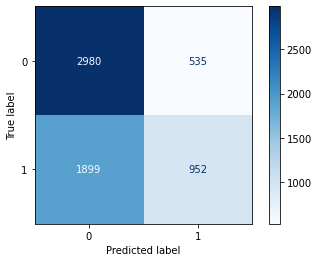

In [156]:
# View confusion matrix

plot_confusion_matrix(gs_count_logreg, X_test, y_test, cmap='Blues', values_format='d');

In [157]:
# Calculate the specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.7669985775248933


In [158]:
# Calculate the sensitivity

sens = tp/(tp+fn)

print('Sensitivity:', sens)

Sensitivity: 0.7036127674500176


In [159]:
accuracy = (tp+tn)/(tp+fp+tn+fn)

print('Accuracy:', accuracy)

Accuracy: 0.7386113729186302


---

#### Gridsearch Accuracy

In [160]:
# Get predictions
preds = gs_count_logreg.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


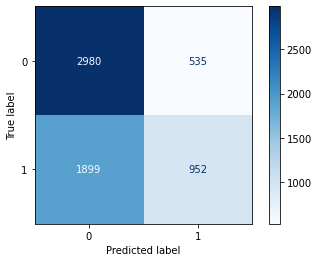

In [161]:
# View confusion matrix

plot_confusion_matrix(gs_count_logreg, X_test, y_test, cmap='Blues', values_format='d');

In [162]:
# Calculate the specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.8477951635846372


In [163]:
# Calculate the sensitivity

sens = tp/(tp+fn)

print('Sensitivity:', sens)

Sensitivity: 0.33391792353560157


In [164]:
accuracy = (tp+tn)/(tp+fp+tn+fn)

print('Accuracy:', accuracy)

Accuracy: 0.6176562990889098


## Error Analysis [Type 1 and Type 2 Errors]

https://www.datasciencecentral.com/understanding-type-i-and-type-ii-errors/

### How many Type I errors [FALSE POSITIVE] are there?


In [165]:
fp

535

### How many Type II errors [FALSE NEGATIVE] are there?


In [166]:
fn

1899

### Which error is worse (Type I vs Type II)?


c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


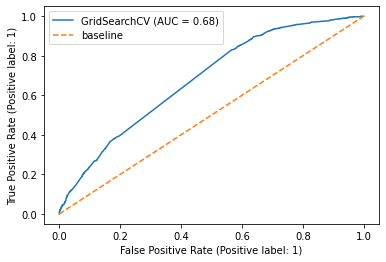

In [167]:
plot_roc_curve(gs_count_logreg, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

The area under the ROC curve measures the degree of overlap between the Specificity and Sensitivity distributions. Greater the area, the less overlap.

---

# Logistic Regression with TIFD Vectorizer

In [168]:
pipe_tfid_logreg = Pipeline([('tfid', TfidfVectorizer()),
                 ('lr', LogisticRegression(solver='lbfgs'))
                ])

In [169]:
cross_val_score(pipe_tfid_logreg, X_train, y_train, cv=5)


array([0.7589942 , 0.74003868, 0.74042553, 0.73965184, 0.75812693])

In [170]:
# ii. Fit into model
pipe_tfid_logreg.fit(X_train, y_train)

# Training score
print(pipe_tfid_logreg.score(X_train, y_train))

# Test score
print(pipe_tfid_logreg.score(X_test, y_test))

0.8469514082327453
0.75416273955388


### Gridsearch

In [171]:
pipe2_params = {
    'tfid__max_features': [2500, 3000, 3500],
    'tfid__min_df': [1, 2],
    'tfid__max_df': [.8,.9, .95],
    'tfid__ngram_range': [(1,1), (1,2)]
}


gs_tfid_logreg = GridSearchCV(pipe_tfid_logreg,param_grid=pipe2_params,scoring=scorers,refit='accuracy_score', cv=5)

In [172]:
gs_tfid_logreg.fit(X_train, y_train)
print(gs_tfid_logreg.best_score_)
gs_tfid_logreg.best_params_

0.7381625955889839


{'tfid__max_df': 0.8,
 'tfid__max_features': 3500,
 'tfid__min_df': 2,
 'tfid__ngram_range': (1, 1)}

In [173]:
gs_tfid_logreg.score(X_train, y_train)

0.8067161869390281

In [174]:
gs_tfid_logreg.score(X_test, y_test)

0.7453660069117185

---

## BOOLEAN MASKING ON DATAFRAME 

WITH ACTUAL TEST TARGET AND PREDICTED VALUES TO FIND OUT THE FALSE POSITIVES AND FALSE NEGATIVES

In [175]:
preds = gs_tfid_logreg.predict(X_test)

In [176]:
preds = pd.Series(preds)

print(type(preds))
preds

<class 'pandas.core.series.Series'>


0       0
1       0
2       0
3       1
4       1
       ..
6361    1
6362    0
6363    1
6364    0
6365    1
Length: 6366, dtype: int64

In [177]:
df = pd.concat([X_test, y_test], axis=1).reset_index()
df

,index,Text,subreddit
0,8406,traditional roth tax bracket actually lower,0
1,14781,daily general discussion advice thread july,0
2,7471,hi wondering would good place put pitch invest...,0
3,25723,bed bath amp beyond inc bbby one heavily short...,1
4,20041,go well morning coffee,1
...,...,...,...
6361,13748,drought hitting ca italy france hard,0
6362,21637,needed become hedge fund manager analyst,1
6363,20291,u gdp accelerated pace q better expected growt...,1
6364,14025,rate portfolio individual stocks,0


In [178]:
df = pd.concat([df, preds], axis=1).reset_index()
df.drop(['level_0','index'],axis=1, inplace=True)
df

,Text,subreddit,0
0,traditional roth tax bracket actually lower,0,0
1,daily general discussion advice thread july,0,0
2,hi wondering would good place put pitch invest...,0,0
3,bed bath amp beyond inc bbby one heavily short...,1,1
4,go well morning coffee,1,1
...,...,...,...
6361,drought hitting ca italy france hard,0,1
6362,needed become hedge fund manager analyst,1,0
6363,u gdp accelerated pace q better expected growt...,1,1
6364,rate portfolio individual stocks,0,0


In [179]:
false_positive_mask = (df['subreddit']== 0)&(df[0]== 1)
false_negative_mask = (df['subreddit']== 1)&(df[0]== 0)

### False Positives List

In [180]:
df[false_positive_mask]['Text']

10      amazon demand problem amazon currently run sal...
76          asana inc nyse asan analyst ideas weekly pick
90                    make sure conviction sentiment true
92                                 much make penny stocks
98      us inflation poised hit four decade high boost...
                              ...                        
6334                        market catalysts coming month
6339    https youtu uduzfqialgm treacherous waters goi...
6348                          irish whiskey bottles casks
6360                               going gsk glaxo adr us
6361                 drought hitting ca italy france hard
Name: Text, Length: 790, dtype: object

### False Negatives List

In [181]:
df[false_negative_mask]['Text']

22      two americans sent prison stealing crypto sim ...
26                              general advice suggestion
33      people think developer sweat economy project m...
34      without wasting time let tell learn ebook lear...
40                      passive income top ways make fast
                              ...                        
6311             k gt k two months macro forward thinking
6340    serious q experienced probability success clos...
6351                        roast picks please tell wrong
6353    letting financially literate folks test skills...
6362             needed become hedge fund manager analyst
Name: Text, Length: 831, dtype: object

---

## Accuracy Check [Logistic Regression with TFID Vectorizer]

### Pipeline Accuracy

In [182]:
# Get predictions
preds = pipe_tfid_logreg.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [183]:
confusion_matrix(y_test, preds)

array([[2742,  773],
       [ 792, 2059]], dtype=int64)

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


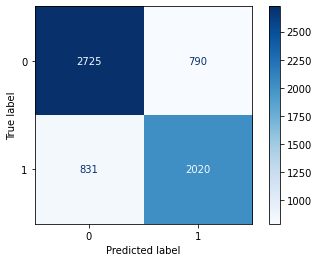

In [184]:
plot_confusion_matrix(gs_tfid_logreg, X_test, y_test, cmap='Blues', values_format='d');

In [185]:
# Calculate the specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.7800853485064011


In [186]:
# Calculate the sensitivity

sens = tp/(tp+fn)

print('Sensitivity:', sens)

Sensitivity: 0.7222027358821466


In [187]:
accuracy = (tp+tn)/(tp+fp+tn+fn)

print('Accuracy:', accuracy)

Accuracy: 0.75416273955388


#### Gridsearch Accuracy

In [188]:
# Get predictions
preds = gs_tfid_logreg.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [189]:
cm2 = confusion_matrix(y_test, preds)
cm2

array([[2725,  790],
       [ 831, 2020]], dtype=int64)

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


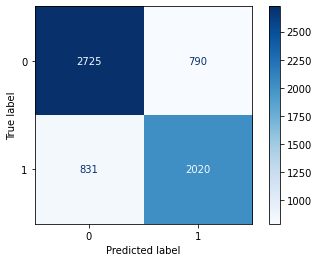

In [190]:
plot_confusion_matrix(gs_tfid_logreg, X_test, y_test, cmap='Blues', values_format='d');

## Error Analysis [Type 1 and Type 2 Errors]

https://www.datasciencecentral.com/understanding-type-i-and-type-ii-errors/


### How many Type I errors [FALSE POSITIVE] are there?


In [191]:
fp

790

### How many Type II errors [FALSE NEGATIVE] are there?


In [192]:
fn

831

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


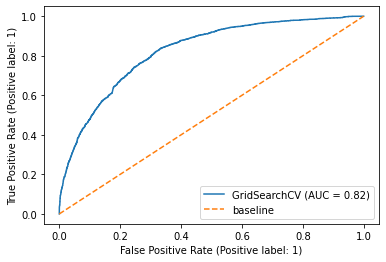

In [193]:
plot_roc_curve(gs_tfid_logreg, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

The area under the ROC curve measures the degree of overlap between the Specificity and Sensitivity distributions. Greater the area, the less overlap.